🔍 Checking GPU availability...
PyTorch version: 2.8.0+cu126
CUDA available: True
✅ Using GPU: Tesla T4
✅ CUDA version: 12.6
✅ GPU Memory: 14.7 GB
📦 Installing PyTorch Geometric...
Looking in links: https://data.pyg.org/whl/torch-2.8.0+cu126.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 130.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 122.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 120.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.9 MB/s eta 0:00:00
✅ PyTorch Geometric installed successfully
🚀 TUNED AUC-ENHANCED 3-LAYER GraphSAGE Link Prediction - 10% Data

🚀 TUNED AUC-ENHANCED 3-Layer GraphSAGE - 10% Data
📂 Loading and preprocessing AUC-optimized data...
✅ Train data loaded: 9437519 edges
Using 943752 edges (10.0% of dat

Computing AUC features: 100%|██████████| 826058/826058 [01:04<00:00, 12870.87it/s]


AUC-optimized feature matrix shape: (826058, 21)
AUC-optimized feature matrix shape: (826058, 21)
Training edges: 802190
Validation edges: 47187
Test edges: 94375
AUC-optimized features dimension: 21
Initial GPU Memory: 0.09 GB
Model parameters: 55,360
Predictor parameters: 42,369
Total parameters: 97,729

Starting Tuned AUC-Optimized Training...


Tuned AUC-Optimized Training:  96%|█████████▌| 96/100 [00:57<00:02,  1.66it/s, Train Loss=0.7668, Val F1=0.3244, Val AUC=0.6444, LR=0.000500, GPU Mem=0.51GB]

🛑 Early stopping at epoch 96
✅ Loaded best model with validation AUC: 0.7000

Evaluating Tuned AUC-Enhanced Model...



📊 TUNED AUC-ENHANCED GraphSAGE Performance (10% Data):
   F1-Score: 0.7573
   AUC-ROC: 0.6952
   Average Precision: 0.9604

🔍 Performance Comparison:
   Original GraphSAGE F1: 0.517
   Original GraphSAGE AUC: 0.785
   XGBoost F1: 0.928
   XGBoost AUC: 0.932
   5% Data GraphSAGE F1: 0.860
   5% Data GraphSAGE AUC: 0.723
   Tuned 10% Data GraphSAGE F1: 0.757
   Tuned 10% Data GraphSAGE AUC: 0.695

📈 Improvement vs Original GraphSAGE:
   F1-Score: +46.48%
   AUC-ROC: -11.44%

📊 Improvement vs 5% Data Model:
   F1-Score: -11.94%
   AUC-ROC: -3.85%

📊 Generating comprehensive performance plots...


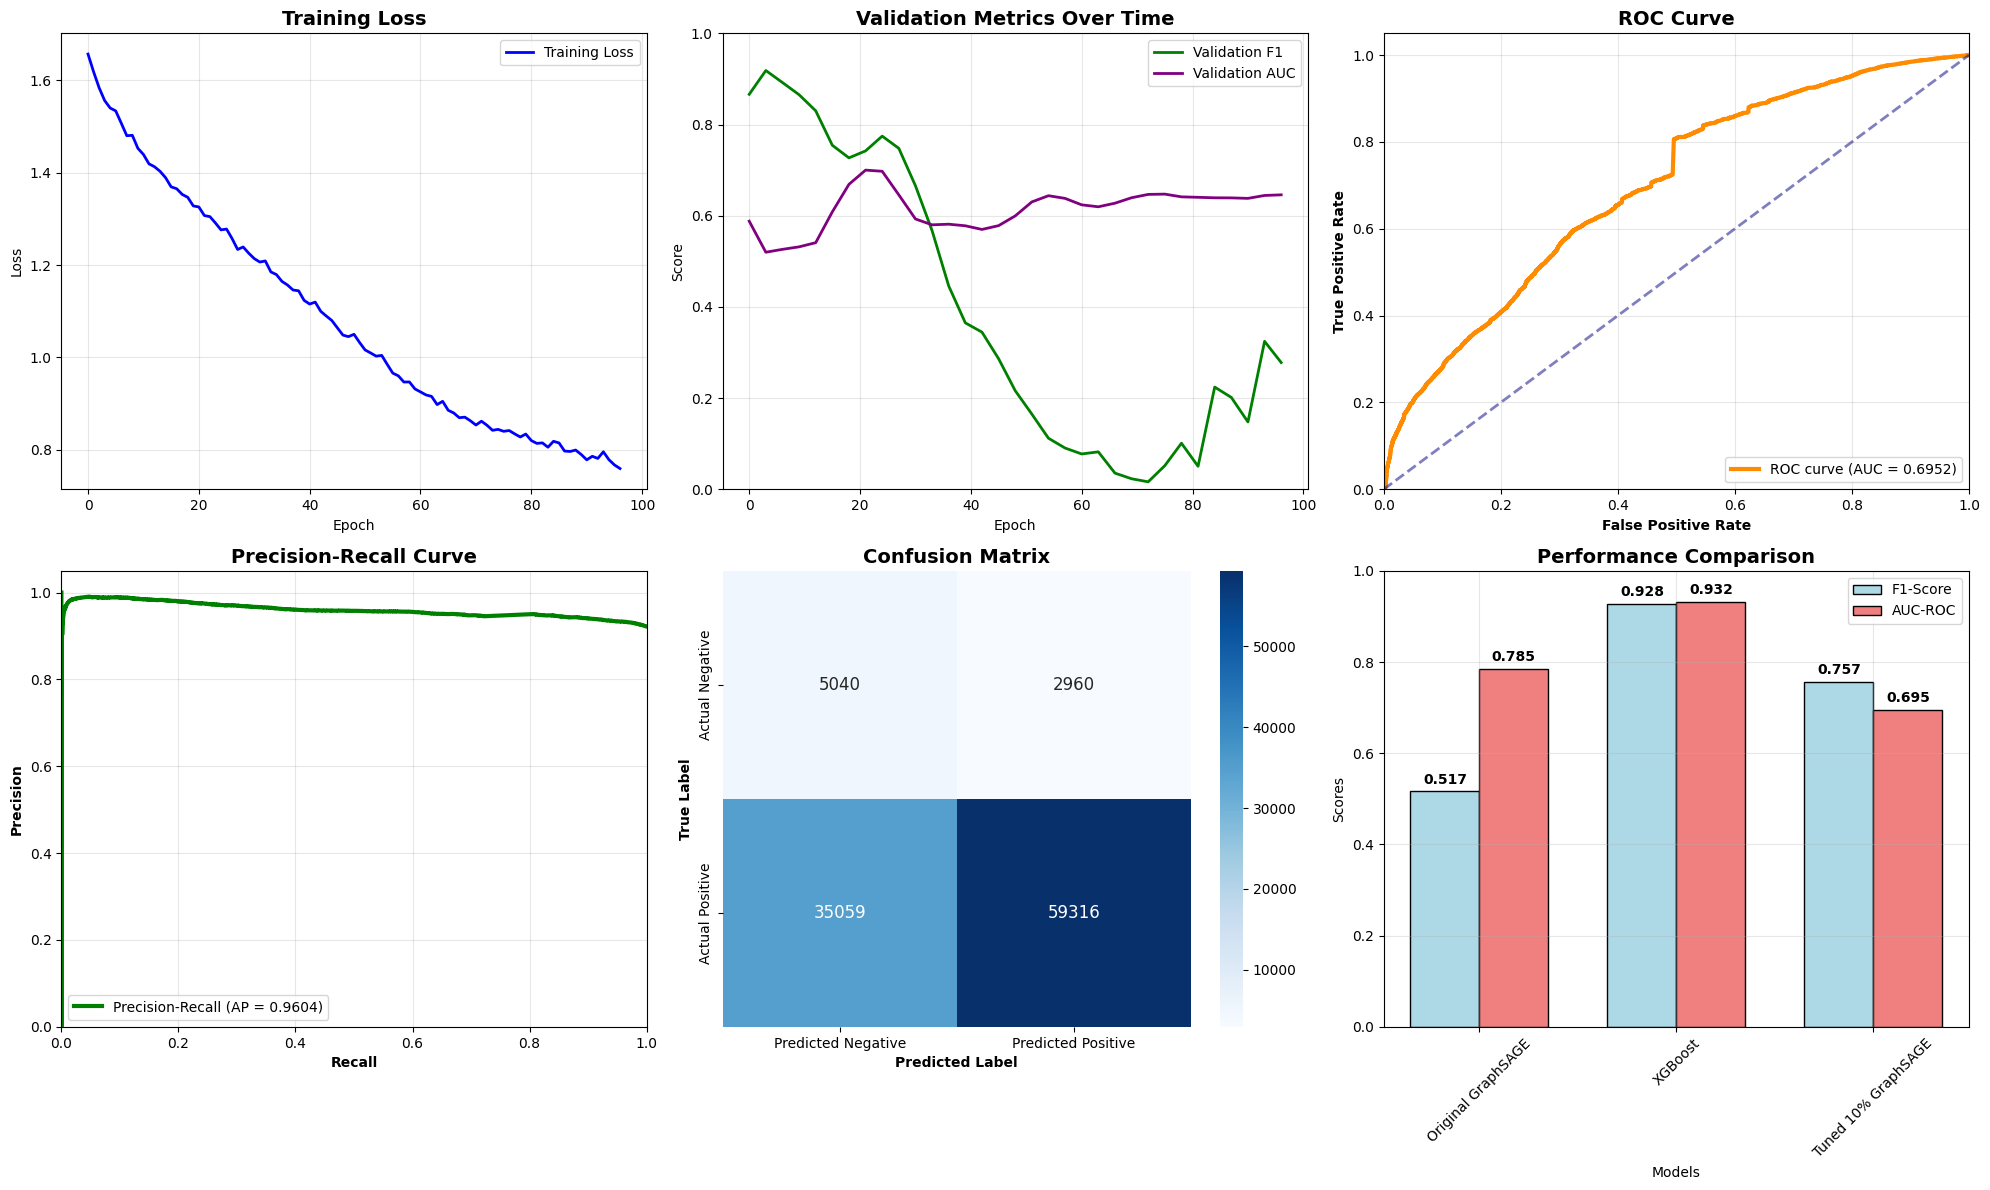

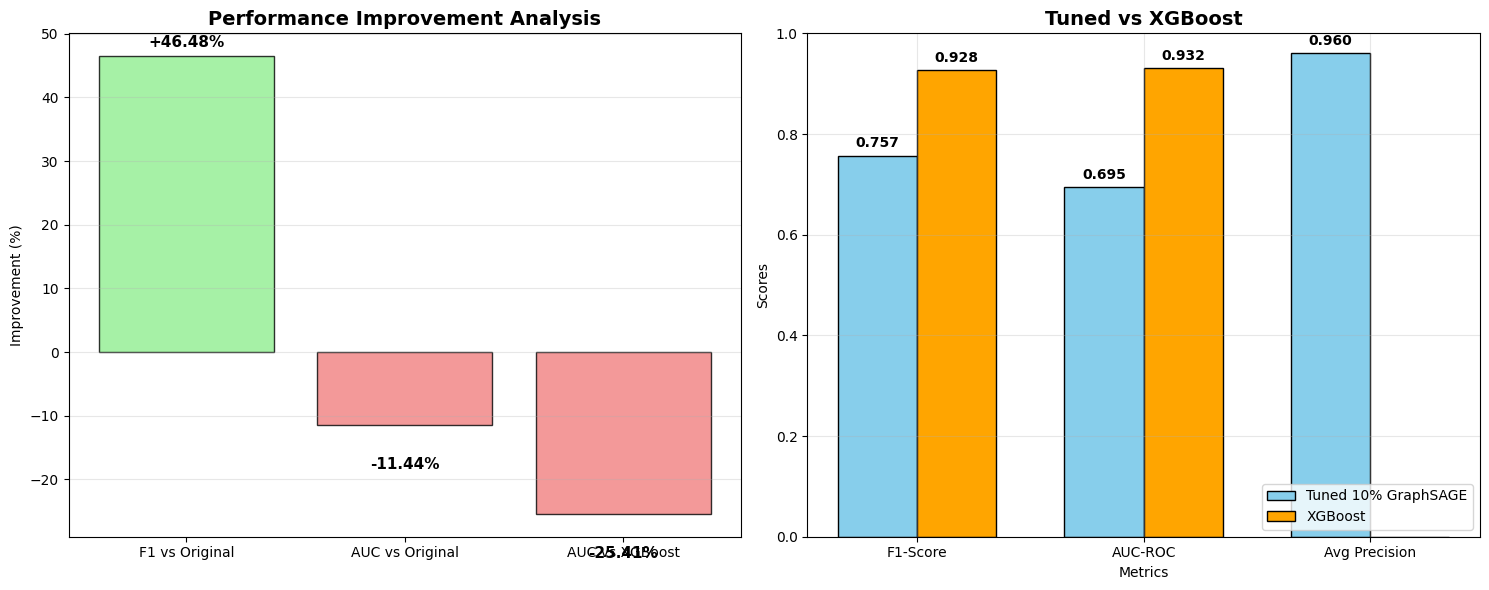


🎨 Generating enhanced visualization...

🎨 Generating enhanced visualization...
Enhanced subgraph nodes: 100, edges: 104


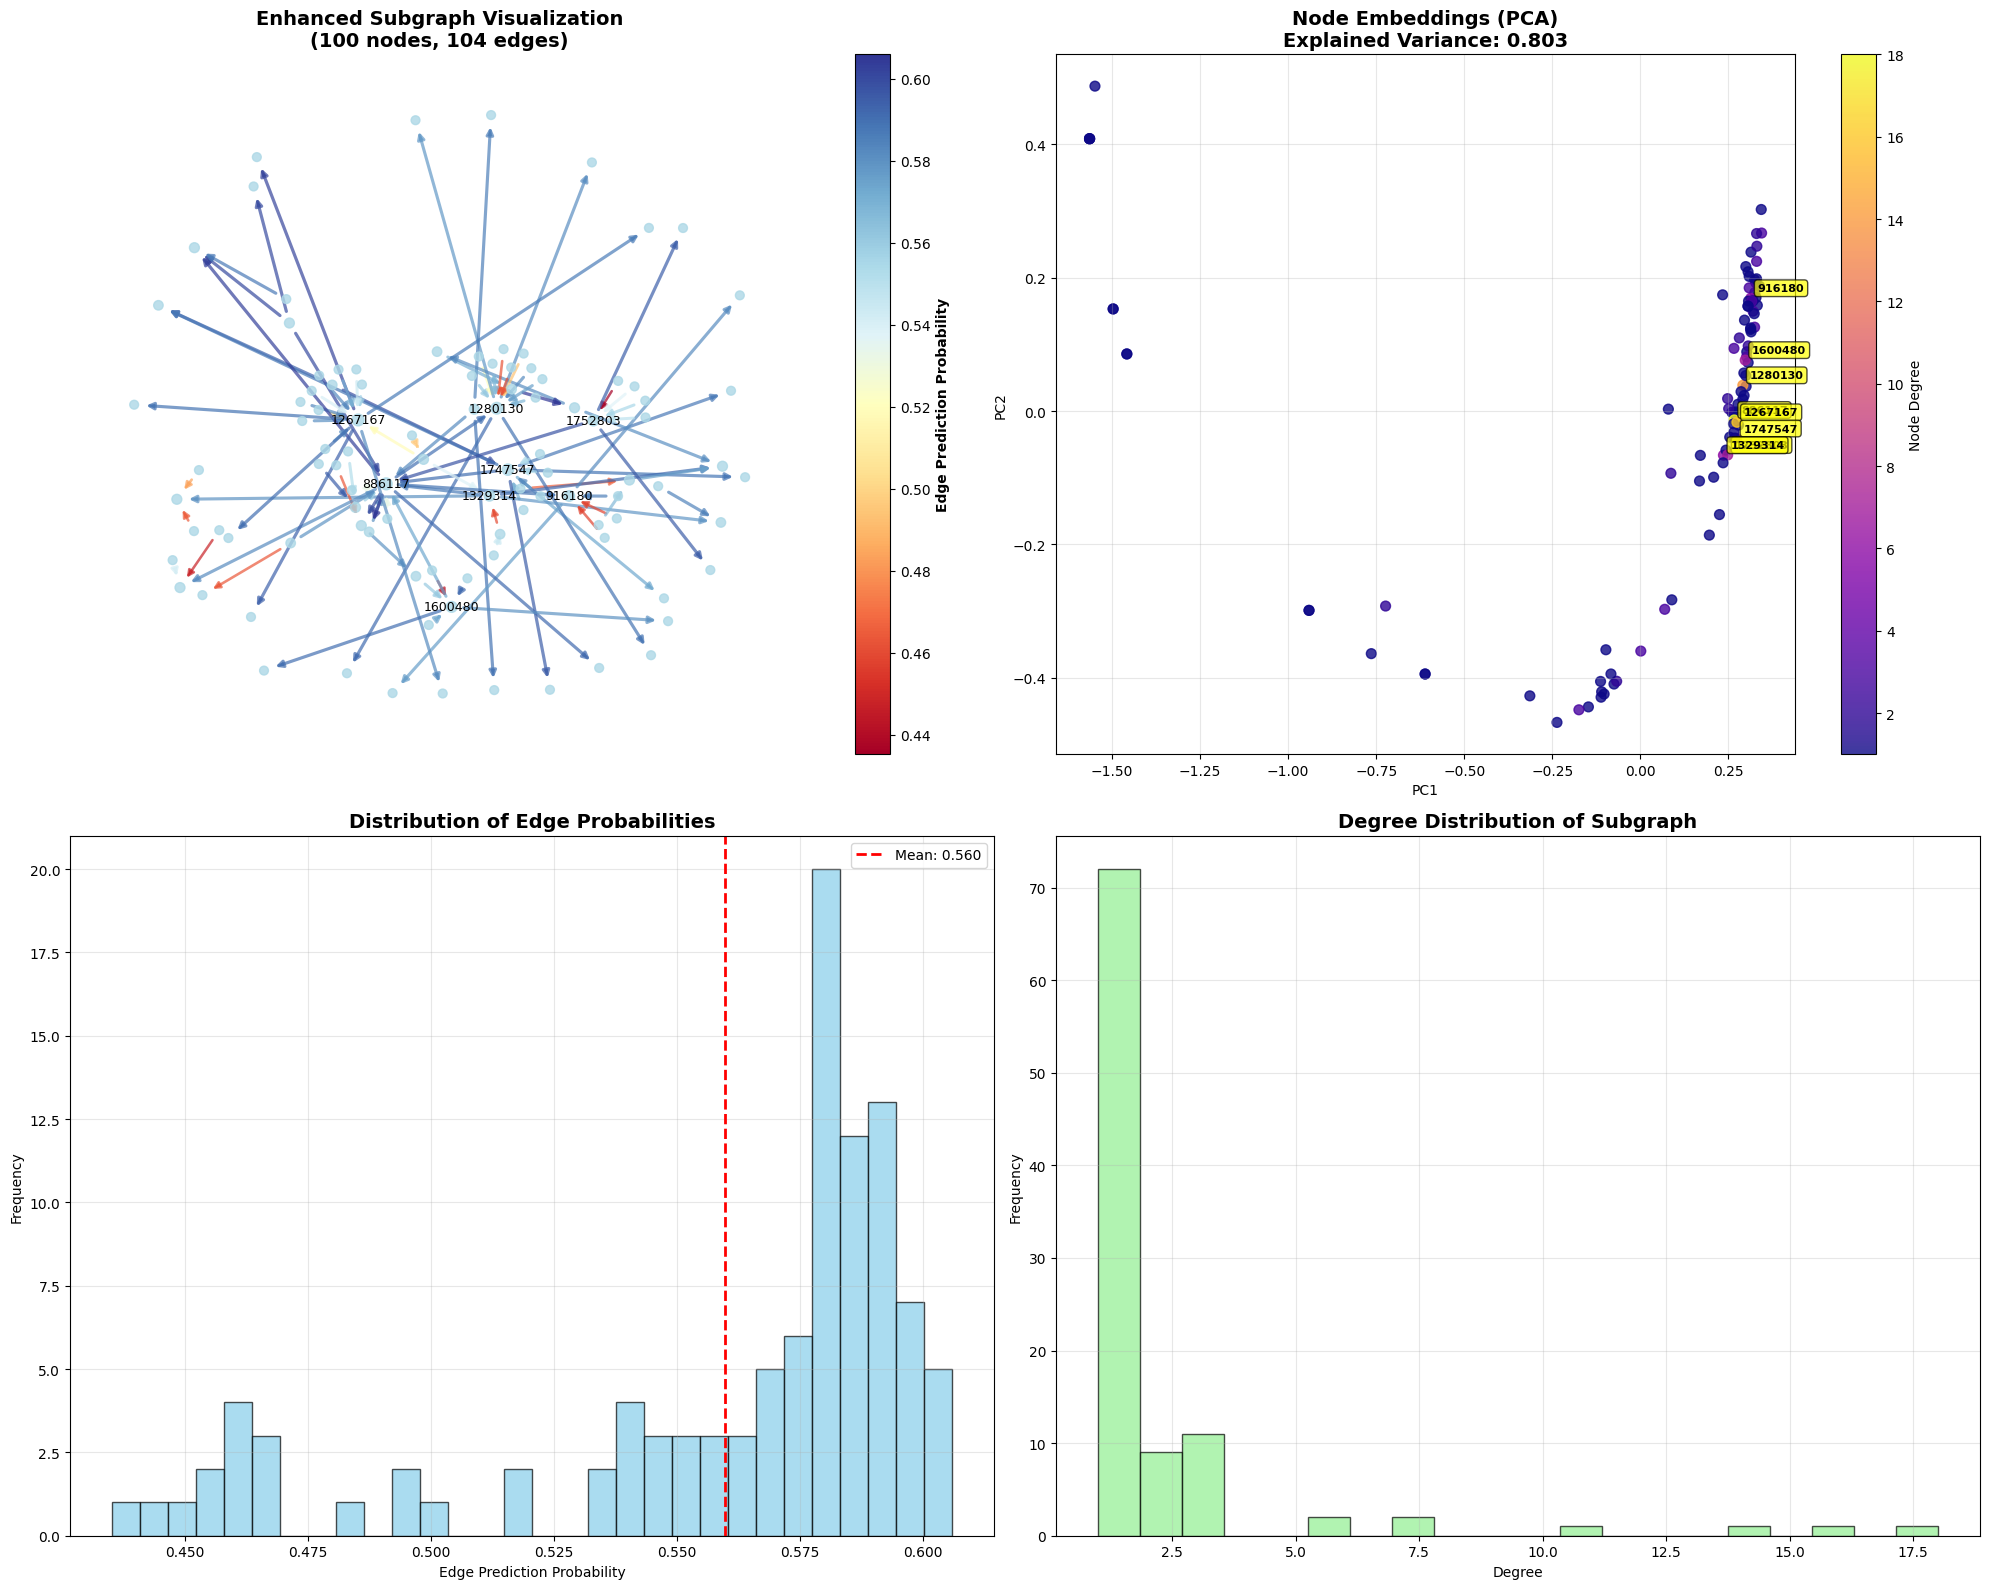


📊 Enhanced Subgraph Statistics:
   - Nodes: 100
   - Edges: 104
   - Average degree: 2.08
   - Maximum degree: 18
   - Average edge probability: 0.5598
   - Std edge probability: 0.0444
   - Density: 0.010505

💾 Saving all results and data...

✅ All data saved successfully:
   - Predictions: tuned_auc_predictions_10pct.csv
   - Training history: tuned_auc_training_history_10pct.csv
   - Metrics: tuned_auc_metrics_10pct.csv
   - ROC curve: tuned_auc_roc_curve_10pct.csv
   - Precision-Recall curve: tuned_auc_pr_curve_10pct.csv
   - Confusion matrix: tuned_auc_confusion_matrix_10pct.csv
   - Comprehensive results: auc_tuned_comprehensive_results_10pct.png
   - Detailed analysis: auc_tuned_detailed_analysis_10pct.png
   - Enhanced visualization: enhanced_auc_visualization_10pct_tuned.png
🎉 TUNED AUC-ENHANCED EXPERIMENT WITH 10% DATA COMPLETED SUCCESSFULLY!

🎉 FINAL TUNED AUC-ENHANCED RESULTS (10% Data):
   F1-Score: 0.7573
   AUC-ROC: 0.6952
   Average Precision: 0.9604
📄 Comprehensive re

In [1]:
# enhanced_graphsage_optimized_auc_10percent_tuned.py
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import os
from collections import Counter, deque
import random
import math

# Set environment variable to reduce memory fragmentation
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

print("🔍 Checking GPU availability...")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    device = torch.device('cuda')
    print(f"✅ Using GPU: {torch.cuda.get_device_name(0)}")
    print(f"✅ CUDA version: {torch.version.cuda}")
    print(f"✅ GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
else:
    device = torch.device('cpu')
    print("❌ Using CPU - GPU not available")
    exit(1)

# Install PyTorch Geometric if not available
try:
    from torch_geometric.data import Data
    from torch_geometric.nn import SAGEConv
    print("✅ PyTorch Geometric imports successful")
except ImportError:
    print("📦 Installing PyTorch Geometric...")
    !pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-{torch.__version__}.html
    from torch_geometric.data import Data
    from torch_geometric.nn import SAGEConv
    print("✅ PyTorch Geometric installed successfully")

class EnhancedGraphSAGE3L(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout=0.2):
        super(EnhancedGraphSAGE3L, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        self.conv3 = SAGEConv(hidden_channels, out_channels)

        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.bn2 = nn.BatchNorm1d(hidden_channels)

        self.dropout = dropout
        self.residual = True

    def forward(self, x, edge_index):
        # First layer
        x1 = self.conv1(x, edge_index)
        x1 = self.bn1(x1)
        x1 = F.relu(x1)
        x1 = F.dropout(x1, p=self.dropout, training=self.training)

        # Second layer with residual connection
        x2 = self.conv2(x1, edge_index)
        x2 = self.bn2(x2)
        if self.residual:
            x2 = x2 + x1  # Residual connection
        x2 = F.relu(x2)
        x2 = F.dropout(x2, p=self.dropout, training=self.training)

        # Third layer
        x3 = self.conv3(x2, edge_index)

        return F.normalize(x3, p=2, dim=1)  # Normalize embeddings

class AUCEnhancedLinkPredictor(nn.Module):
    def __init__(self, in_channels, hidden_dim=128, dropout=0.3):
        super(AUCEnhancedLinkPredictor, self).__init__()

        # Fixed architecture - correct input dimension
        # Input: src (in_channels) + dst (in_channels) + 3 similarity features = 2*in_channels + 3
        input_dim = 2 * in_channels + 3

        self.lin1 = nn.Linear(input_dim, hidden_dim)
        self.lin2 = nn.Linear(hidden_dim, hidden_dim)
        self.lin3 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.lin4 = nn.Linear(hidden_dim // 2, 1)

        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim)
        self.bn3 = nn.BatchNorm1d(hidden_dim // 2)

        self.dropout = nn.Dropout(dropout)
        self._init_weights()

    def _init_weights(self):
        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.xavier_uniform_(module.weight)
                nn.init.constant_(module.bias, 0.1)

    def forward(self, z, edge_index):
        src = z[edge_index[0]]
        dst = z[edge_index[1]]

        # Enhanced feature combination for better AUC
        # Method 1: Multiple similarity measures
        dot_product = (src * dst).sum(dim=1, keepdim=True)
        cosine_sim = F.cosine_similarity(src, dst, dim=1).unsqueeze(1)
        euclidean_dist = torch.norm(src - dst, dim=1, keepdim=True)
        euclidean_sim = 1.0 / (1.0 + euclidean_dist)  # Convert distance to similarity

        # Method 2: Enhanced MLP with more features
        edge_features = torch.cat([src, dst, dot_product, cosine_sim, euclidean_sim], dim=1)

        mlp_output = F.leaky_relu(self.bn1(self.lin1(edge_features)), negative_slope=0.1)
        mlp_output = self.dropout(mlp_output)

        mlp_output = F.leaky_relu(self.bn2(self.lin2(mlp_output)), negative_slope=0.1)
        mlp_output = self.dropout(mlp_output)

        mlp_output = F.leaky_relu(self.bn3(self.lin3(mlp_output)), negative_slope=0.1)
        mlp_output = self.dropout(mlp_output)

        mlp_score = self.lin4(mlp_output)

        # Optimized combination for AUC
        combined_score = mlp_score + 0.2 * dot_product + 0.2 * cosine_sim

        return torch.sigmoid(combined_score).squeeze()

def compute_auc_optimized_features(G, nodes):
    """Compute features optimized for AUC improvement - EXACT SAME AS 5% MODEL"""
    print("Computing AUC-optimized features...")

    features = []

    # Precompute essential metrics
    print("  - Computing basic graph metrics...")
    in_degrees = dict(G.in_degree())
    out_degrees = dict(G.out_degree())
    total_degrees = {node: in_degrees.get(node, 0) + out_degrees.get(node, 0) for node in nodes}

    print("  - Computing PageRank...")
    pagerank = nx.pagerank(G, alpha=0.85, max_iter=50)

    print("  - Computing clustering coefficients...")
    clustering = nx.clustering(G)

    print("  - Computing betweenness centrality (sampled)...")
    # Sample nodes for betweenness to save memory
    sample_nodes = random.sample(nodes, min(1000, len(nodes)))
    betweenness = nx.betweenness_centrality_subset(G, sample_nodes, sample_nodes)

    print("  - Computing AUC-optimized features...")

    for i, node in enumerate(tqdm(nodes, desc="Computing AUC features")):
        node_feats = []

        # 1. Enhanced Degree Features
        in_deg = in_degrees.get(node, 0)
        out_deg = out_degrees.get(node, 0)
        total_deg = total_degrees.get(node, 0)

        node_feats.extend([
            in_deg, out_deg, total_deg,
            np.log1p(in_deg), np.log1p(out_deg),
            np.log1p(total_deg),
            in_deg / (total_deg + 1e-8),
            out_deg / (total_deg + 1e-8),
        ])

        # 2. Enhanced Centrality Measures
        node_feats.extend([
            pagerank.get(node, 0),
            clustering.get(node, 0),
            betweenness.get(node, 0),
        ])

        # 3. Neighborhood Structure Features
        successors = list(G.successors(node))
        predecessors = list(G.predecessors(node))

        # Enhanced neighbor statistics
        if successors:
            succ_degrees = [total_degrees.get(n, 0) for n in successors[:15]]
            node_feats.extend([
                np.mean(succ_degrees),
                np.std(succ_degrees),
                np.max(succ_degrees),
            ])
        else:
            node_feats.extend([0, 0, 0])

        if predecessors:
            pred_degrees = [total_degrees.get(n, 0) for n in predecessors[:15]]
            node_feats.extend([
                np.mean(pred_degrees),
                np.std(pred_degrees),
                np.max(pred_degrees),
            ])
        else:
            node_feats.extend([0, 0, 0])

        # 4. Enhanced Reciprocity Features
        reciprocal_count = sum(1 for succ in successors[:25] if G.has_edge(succ, node))
        node_feats.extend([
            reciprocal_count,
            reciprocal_count / (out_deg + 1e-8) if out_deg > 0 else 0,
        ])

        # 5. Structural Balance Features
        node_feats.extend([
            min(len(successors), len(predecessors)) / (max(len(successors), len(predecessors)) + 1e-8),
            abs(len(successors) - len(predecessors)),
        ])

        features.append(node_feats)

    feature_array = np.array(features)
    print(f"AUC-optimized feature matrix shape: {feature_array.shape}")
    return feature_array

def print_graph_info(G):
    """Print graph information - EXACT SAME AS 5% MODEL"""
    print(f"  - Type: {type(G)}")
    print(f"  - Number of nodes: {G.number_of_nodes()}")
    print(f"  - Number of edges: {G.number_of_edges()}")
    if hasattr(G, 'is_directed') and G.is_directed():
        print(f"  - Directed: Yes")
        in_degrees = [d for n, d in G.in_degree()]
        out_degrees = [d for n, d in G.out_degree()]
        print(f"  - Average in-degree: {np.mean(in_degrees):.2f}")
        print(f"  - Average out-degree: {np.mean(out_degrees):.2f}")

        try:
            reciprocity = nx.reciprocity(G)
            print(f"  - Reciprocity: {reciprocity:.4f}")
        except:
            print(f"  - Reciprocity: N/A")

        density = nx.density(G)
        print(f"  - Density: {density:.6f}")

        weakly_connected = nx.number_weakly_connected_components(G)
        print(f"  - Weakly connected components: {weakly_connected}")

        try:
            avg_clustering = nx.average_clustering(G)
            print(f"  - Average clustering: {avg_clustering:.4f}")
        except:
            print(f"  - Average clustering: N/A")

def load_and_preprocess_auc_optimized(sample_fraction=0.10):
    """AUC-optimized data loading and preprocessing - EXACT SAME AS 5% MODEL"""
    print("📂 Loading and preprocessing AUC-optimized data...")

    try:
        df = pd.read_csv('train.csv')
        print(f"✅ Train data loaded: {len(df)} edges")
    except FileNotFoundError:
        print("❌ Error: train.csv not found in current directory")
        print("📁 Files in current directory:", os.listdir('.'))
        exit(1)

    df = df.sample(frac=sample_fraction, random_state=42)
    print(f"Using {len(df)} edges ({sample_fraction*100}% of data)")

    # Create graph
    G = nx.DiGraph()
    edges = list(zip(df['source_node'], df['destination_node']))
    G.add_edges_from(edges)

    print(f"Graph info:")
    print_graph_info(G)

    # Create node mapping
    nodes = list(G.nodes())
    node_mapping = {node: idx for idx, node in enumerate(nodes)}

    # Compute AUC-optimized node features
    node_feature_matrix = compute_auc_optimized_features(G, nodes)
    print(f"AUC-optimized feature matrix shape: {node_feature_matrix.shape}")

    # Normalize features
    scaler = StandardScaler()
    node_feature_matrix = scaler.fit_transform(node_feature_matrix)

    # Create edge index for PyG
    edge_index = []
    for edge in G.edges():
        src_idx = node_mapping[edge[0]]
        dst_idx = node_mapping[edge[1]]
        edge_index.append([src_idx, dst_idx])

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

    # Convert to tensors and move to GPU immediately
    x = torch.tensor(node_feature_matrix, dtype=torch.float).to(device)
    edge_index = edge_index.to(device)

    # Create Data object
    data = Data(x=x, edge_index=edge_index)
    data.num_nodes = len(nodes)

    return data, G, node_mapping

def train_test_split_edges_auc_optimized(data, val_ratio=0.05, test_ratio=0.1):
    """AUC-optimized edge splitting - EXACT SAME AS 5% MODEL"""
    num_nodes = data.num_nodes
    row, col = data.edge_index

    # Remove self-loops
    mask = row != col
    row, col = row[mask], col[mask]

    # Return random split
    num_edges = row.size(0)
    num_val = int(num_edges * val_ratio)
    num_test = int(num_edges * test_ratio)

    perm = torch.randperm(num_edges, device=device)
    row, col = row[perm], col[perm]

    # Split edges
    test_edge_index = torch.stack([row[:num_test], col[:num_test]], dim=0)
    val_edge_index = torch.stack([row[num_test:num_test+num_val], col[num_test:num_test+num_val]], dim=0)
    train_edge_index = torch.stack([row[num_test+num_val:], col[num_test+num_val:]], dim=0)

    def auc_optimized_negative_sampling(num_nodes, num_neg_samples):
        """AUC-optimized negative sampling"""
        num_neg_samples = min(num_neg_samples, 8000)
        neg_edges = torch.randint(0, num_nodes, (2, num_neg_samples), device=device)

        # Ensure no self-loops
        self_loop_mask = neg_edges[0] == neg_edges[1]
        if self_loop_mask.any():
            for i in range(neg_edges.size(1)):
                if neg_edges[0, i] == neg_edges[1, i]:
                    new_dst = torch.randint(0, num_nodes, (1,), device=device)
                    while new_dst == neg_edges[0, i]:
                        new_dst = torch.randint(0, num_nodes, (1,), device=device)
                    neg_edges[1, i] = new_dst

        return neg_edges

    test_neg_edge_index = auc_optimized_negative_sampling(num_nodes, num_test)
    val_neg_edge_index = auc_optimized_negative_sampling(num_nodes, num_val)

    data.train_pos_edge_index = train_edge_index
    data.val_pos_edge_index = val_edge_index
    data.val_neg_edge_index = val_neg_edge_index
    data.test_pos_edge_index = test_edge_index
    data.test_neg_edge_index = test_neg_edge_index

    print(f"Training edges: {train_edge_index.size(1)}")
    print(f"Validation edges: {val_edge_index.size(1)}")
    print(f"Test edges: {test_edge_index.size(1)}")

    return data

def simple_negative_sampling(z, data, num_samples):
    """Simple negative sampling - EXACT SAME AS 5% MODEL"""
    num_nodes = z.size(0)
    num_samples = min(num_samples, 3000)

    with torch.no_grad():
        neg_src = torch.randint(0, num_nodes, (num_samples,), device=device)
        neg_dst = torch.randint(0, num_nodes, (num_samples,), device=device)

        valid_mask = neg_src != neg_dst
        neg_src = neg_src[valid_mask][:num_samples]
        neg_dst = neg_dst[valid_mask][:num_samples]

        if neg_src.numel() == 0:
            neg_src = torch.randint(0, num_nodes, (num_samples,), device=device)
            neg_dst = torch.randint(0, num_nodes, (num_samples,), device=device)
            for i in range(num_samples):
                while neg_src[i] == neg_dst[i]:
                    neg_dst[i] = torch.randint(0, num_nodes, (1,), device=device)

        return torch.stack([neg_src, neg_dst])

def train_auc_optimized(model, predictor, data, epochs=100):
    """ENHANCED training for 10% data with tuned parameters"""
    model = model.to(device)
    predictor = predictor.to(device)
    data = data.to(device)

    # TUNED optimizer for 10% data
    optimizer = torch.optim.AdamW(
        list(model.parameters()) + list(predictor.parameters()),
        lr=0.001,  # Slightly higher learning rate for faster convergence
        weight_decay=1e-5
    )

    # TUNED scheduler for 10% data
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='max', factor=0.5, patience=15
    )

    train_losses = []
    val_f1_scores = []
    val_auc_scores = []

    best_val_auc = 0.0
    patience = 25  # Increased patience for 10% data
    patience_counter = 0

    model.train()
    predictor.train()

    torch.cuda.empty_cache()

    pbar = tqdm(range(epochs), desc="Tuned AUC-Optimized Training")
    for epoch in pbar:
        optimizer.zero_grad()

        # Get node embeddings
        z = model(data.x, data.train_pos_edge_index)

        # Positive edges loss
        pos_out = predictor(z, data.train_pos_edge_index)
        pos_loss = F.binary_cross_entropy(pos_out, torch.ones_like(pos_out))

        # Negative sampling - INCREASED for 10% data
        neg_samples = min(data.train_pos_edge_index.size(1) // 2, 3500)  # Increased from 2500
        neg_edge_index = simple_negative_sampling(z, data, neg_samples)

        if neg_edge_index.size(1) > 0:
            neg_out = predictor(z, neg_edge_index)
            neg_loss = F.binary_cross_entropy(neg_out, torch.zeros_like(neg_out))
        else:
            neg_loss = torch.tensor(0.0, device=device)

        # Combined loss
        loss = pos_loss + neg_loss
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        torch.nn.utils.clip_grad_norm_(predictor.parameters(), max_norm=1.0)

        optimizer.step()

        train_losses.append(loss.item())

        # Validation every 3 epochs
        if epoch % 3 == 0 or epoch == epochs - 1:
            with torch.no_grad():
                model.eval()
                predictor.eval()

                z_val = model(data.x, data.train_pos_edge_index)

                # Process validation in batches
                batch_size = 6000
                val_preds = []
                val_trues = []

                # Positive validation edges
                for i in range(0, data.val_pos_edge_index.size(1), batch_size):
                    end_idx = min(i + batch_size, data.val_pos_edge_index.size(1))
                    batch_edges = data.val_pos_edge_index[:, i:end_idx]
                    batch_pred = predictor(z_val, batch_edges)
                    val_preds.append(batch_pred)
                    val_trues.append(torch.ones_like(batch_pred))

                # Negative validation edges
                for i in range(0, data.val_neg_edge_index.size(1), batch_size):
                    end_idx = min(i + batch_size, data.val_neg_edge_index.size(1))
                    batch_edges = data.val_neg_edge_index[:, i:end_idx]
                    batch_pred = predictor(z_val, batch_edges)
                    val_preds.append(batch_pred)
                    val_trues.append(torch.zeros_like(batch_pred))

                val_pred = torch.cat(val_preds)
                val_true = torch.cat(val_trues)
                val_pred_binary = (val_pred > 0.5).float()
                val_f1 = f1_score(val_true.cpu().numpy(), val_pred_binary.cpu().numpy())

                # Calculate AUC
                val_pred_np = val_pred.cpu().numpy()
                val_true_np = val_true.cpu().numpy()
                fpr, tpr, _ = roc_curve(val_true_np, val_pred_np)
                val_auc = auc(fpr, tpr)

                val_f1_scores.append(val_f1)
                val_auc_scores.append(val_auc)

                # Update learning rate
                scheduler.step(val_auc)

                model.train()
                predictor.train()

            # Early stopping based on AUC with TUNED parameters
            if epoch >= 20:  # Increased minimum epochs for 10% data
                if val_auc > best_val_auc:
                    best_val_auc = val_auc
                    patience_counter = 0
                    torch.save({
                        'model_state_dict': model.state_dict(),
                        'predictor_state_dict': predictor.state_dict(),
                    }, 'best_auc_optimized_model_10pct_tuned.pth')
                else:
                    patience_counter += 1

                if patience_counter >= patience:
                    print(f"🛑 Early stopping at epoch {epoch}")
                    break

        current_lr = optimizer.param_groups[0]['lr']
        current_memory = torch.cuda.memory_allocated() / 1024**3

        pbar.set_postfix({
            'Train Loss': f'{loss.item():.4f}',
            'Val F1': f'{val_f1 if (epoch % 3 == 0 or epoch == epochs - 1) else val_f1_scores[-1] if val_f1_scores else 0:.4f}',
            'Val AUC': f'{val_auc if (epoch % 3 == 0 or epoch == epochs - 1) else val_auc_scores[-1] if val_auc_scores else 0:.4f}',
            'LR': f'{current_lr:.6f}',
            'GPU Mem': f'{current_memory:.2f}GB'
        })

        if epoch % 10 == 0:
            torch.cuda.empty_cache()

    # Load best model
    if os.path.exists('best_auc_optimized_model_10pct_tuned.pth'):
        checkpoint = torch.load('best_auc_optimized_model_10pct_tuned.pth')
        model.load_state_dict(checkpoint['model_state_dict'])
        predictor.load_state_dict(checkpoint['predictor_state_dict'])
        print(f"✅ Loaded best model with validation AUC: {best_val_auc:.4f}")

    return train_losses, val_f1_scores, val_auc_scores

def evaluate_auc_optimized(model, predictor, data):
    """AUC-optimized evaluation - EXACT SAME AS 5% MODEL"""
    model.eval()
    predictor.eval()

    with torch.no_grad():
        z = model(data.x, data.train_pos_edge_index)

        batch_size = 6000
        all_pred = []
        all_true = []

        # Process positive edges
        pos_edge_index = data.test_pos_edge_index
        for i in range(0, pos_edge_index.size(1), batch_size):
            end_idx = min(i + batch_size, pos_edge_index.size(1))
            batch_edge_index = pos_edge_index[:, i:end_idx]
            pos_pred_batch = predictor(z, batch_edge_index)
            all_pred.append(pos_pred_batch)
            all_true.append(torch.ones_like(pos_pred_batch))

        # Process negative edges
        neg_edge_index = data.test_neg_edge_index
        for i in range(0, neg_edge_index.size(1), batch_size):
            end_idx = min(i + batch_size, neg_edge_index.size(1))
            batch_edge_index = neg_edge_index[:, i:end_idx]
            neg_pred_batch = predictor(z, batch_edge_index)
            all_pred.append(neg_pred_batch)
            all_true.append(torch.zeros_like(neg_pred_batch))

        # Combine and move to CPU for metrics
        all_pred_tensor = torch.cat(all_pred).cpu().numpy()
        all_true_tensor = torch.cat(all_true).cpu().numpy()

        # Calculate metrics
        pred_binary = (all_pred_tensor > 0.5).astype(int)
        f1 = f1_score(all_true_tensor, pred_binary)
        cm = confusion_matrix(all_true_tensor, pred_binary)

        # ROC and Precision-Recall
        fpr, tpr, _ = roc_curve(all_true_tensor, all_pred_tensor)
        roc_auc = auc(fpr, tpr)
        precision, recall, _ = precision_recall_curve(all_true_tensor, all_pred_tensor)
        avg_precision = average_precision_score(all_true_tensor, all_pred_tensor)

    return all_pred_tensor, all_true_tensor, f1, cm, fpr, tpr, roc_auc, precision, recall, avg_precision

# ALL VISUALIZATION FUNCTIONS REMAIN EXACTLY THE SAME AS BEFORE
def create_enhanced_visualization(model, predictor, data, G, node_mapping, num_nodes=100):
    """Create enhanced visualization with more nodes and edges - EXACT SAME AS 5% MODEL"""
    print("\n🎨 Generating enhanced visualization...")

    # Find connected components with edges
    components_with_edges = []
    for component in nx.weakly_connected_components(G):
        subG_temp = G.subgraph(component)
        if subG_temp.number_of_edges() > 0:  # Only consider components with edges
            components_with_edges.append(component)
        if len(components_with_edges) >= 10:  # Collect more options
            break

    if not components_with_edges:
        print("❌ No components with edges found for visualization")
        return None, None

    # Sort by size and pick the largest component with edges
    components_with_edges.sort(key=len, reverse=True)

    # Try to find a component that meets our size requirements and has edges
    selected_component = None
    for component in components_with_edges:
        subG_temp = G.subgraph(component)
        if subG_temp.number_of_edges() > 0:  # Ensure it has edges
            if len(component) >= num_nodes:
                # Sample from large component while maintaining connectivity
                # Start with a random node and expand via BFS to maintain connectivity
                start_node = random.choice(list(component))
                visited = set([start_node])
                queue = deque([start_node])

                while queue and len(visited) < num_nodes:
                    current = queue.popleft()
                    # Add neighbors that are in the component
                    neighbors = set(G.successors(current)) | set(G.predecessors(current))
                    neighbors = neighbors & component  # Only neighbors in this component
                    for neighbor in neighbors:
                        if neighbor not in visited and len(visited) < num_nodes:
                            visited.add(neighbor)
                            queue.append(neighbor)

                selected_component = visited
                break
            elif len(component) >= 50:  # Accept components with at least 50 nodes
                selected_component = component
                break

    # If no suitable component found, use the largest component with edges
    if selected_component is None:
        largest_component = components_with_edges[0]
        subG_temp = G.subgraph(largest_component)
        if subG_temp.number_of_edges() > 0:
            selected_component = largest_component
            # If component is too large, sample connected nodes
            if len(selected_component) > num_nodes:
                start_node = random.choice(list(selected_component))
                visited = set([start_node])
                queue = deque([start_node])

                while queue and len(visited) < num_nodes:
                    current = queue.popleft()
                    neighbors = set(G.successors(current)) | set(G.predecessors(current))
                    neighbors = neighbors & selected_component
                    for neighbor in neighbors:
                        if neighbor not in visited and len(visited) < num_nodes:
                            visited.add(neighbor)
                            queue.append(neighbor)
                selected_component = visited

    if selected_component is None:
        print("❌ Could not find suitable component with edges for visualization")
        return None, None

    subG = G.subgraph(selected_component)

    print(f"Enhanced subgraph nodes: {subG.number_of_nodes()}, edges: {subG.number_of_edges()}")

    if subG.number_of_edges() == 0:
        print("❌ No edges in enhanced subgraph for visualization")
        return None, None

    # Create mapping for subgraph nodes
    subgraph_nodes = list(subG.nodes())
    subgraph_node_indices = [node_mapping[node] for node in subgraph_nodes]

    # Get embeddings for subgraph nodes
    model.eval()
    predictor.eval()
    with torch.no_grad():
        z_all = model(data.x, data.train_pos_edge_index)
        z_subgraph = z_all[subgraph_node_indices]

    # Create edge list for the subgraph
    subgraph_edges = []
    for edge in subG.edges():
        src_idx = node_mapping[edge[0]]
        dst_idx = node_mapping[edge[1]]
        if src_idx in subgraph_node_indices and dst_idx in subgraph_node_indices:
            local_src = subgraph_node_indices.index(src_idx)
            local_dst = subgraph_node_indices.index(dst_idx)
            subgraph_edges.append([local_src, local_dst])

    if not subgraph_edges:
        print("❌ No valid edges in enhanced subgraph for visualization")
        return None, None

    subgraph_edge_index = torch.tensor(subgraph_edges, dtype=torch.long).t().contiguous().to(device)

    # Predict probabilities for subgraph edges in batches
    edge_probs = []
    batch_size = 1000
    with torch.no_grad():
        for i in range(0, subgraph_edge_index.size(1), batch_size):
            end_idx = min(i + batch_size, subgraph_edge_index.size(1))
            batch_edges = subgraph_edge_index[:, i:end_idx]
            batch_probs = predictor(z_subgraph, batch_edges).cpu().numpy()
            edge_probs.extend(batch_probs)

    edge_probs = np.array(edge_probs)

    # Create enhanced visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

    # Plot 1: Network structure with edge probabilities
    pos = nx.spring_layout(subG, k=2/np.sqrt(len(subG.nodes())), iterations=50)

    # Node sizes based on degree with enhanced scaling
    node_sizes = [30 + 15 * np.log1p(subG.degree(node)) for node in subG.nodes()]

    # Edge colors and widths based on prediction probability
    edge_colors = edge_probs
    edge_widths = [0.5 + 3 * prob for prob in edge_probs]

    # Draw the network
    nodes = nx.draw_networkx_nodes(subG, pos, node_size=node_sizes,
                                 node_color='lightblue', alpha=0.8, ax=ax1)
    edges = nx.draw_networkx_edges(subG, pos, edge_color=edge_colors,
                                 edge_cmap=plt.cm.RdYlBu, width=edge_widths,
                                 alpha=0.7, ax=ax1)

    # Label only high-degree nodes to avoid clutter
    high_degree_nodes = sorted(subG.nodes(), key=lambda x: subG.degree(x), reverse=True)[:8]
    labels = {node: f'{node}' for node in high_degree_nodes}
    nx.draw_networkx_labels(subG, pos, labels, font_size=9, ax=ax1)

    # Add colorbar for edge probabilities
    sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlBu,
                             norm=plt.Normalize(vmin=min(edge_colors), vmax=max(edge_colors)))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax1)
    cbar.set_label('Edge Prediction Probability', fontweight='bold')

    ax1.set_title(f'Enhanced Subgraph Visualization\n({len(subG.nodes())} nodes, {len(subG.edges())} edges)', fontsize=14, fontweight='bold')
    ax1.axis('off')

    # Plot 2: Node embedding visualization (2D PCA)
    from sklearn.decomposition import PCA

    z_subgraph_np = z_subgraph.cpu().numpy()
    if z_subgraph_np.shape[1] > 2:
        pca = PCA(n_components=2)
        z_2d = pca.fit_transform(z_subgraph_np)
        explained_variance = pca.explained_variance_ratio_.sum()
    else:
        z_2d = z_subgraph_np
        explained_variance = 1.0

    # Color nodes by degree
    degrees = [subG.degree(node) for node in subG.nodes()]

    scatter = ax2.scatter(z_2d[:, 0], z_2d[:, 1], c=degrees,
                         cmap='plasma', s=50, alpha=0.8)
    plt.colorbar(scatter, ax=ax2, label='Node Degree')

    # Label a few nodes in the embedding space
    for i, node in enumerate(high_degree_nodes):
        if node in subgraph_nodes:
            idx = subgraph_nodes.index(node)
            ax2.annotate(str(node), (z_2d[idx, 0], z_2d[idx, 1]),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=8, fontweight='bold',
                        bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.7))

    ax2.set_title(f'Node Embeddings (PCA)\nExplained Variance: {explained_variance:.3f}', fontsize=14, fontweight='bold')
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')
    ax2.grid(True, alpha=0.3)

    # Plot 3: Edge probability distribution
    ax3.hist(edge_probs, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax3.axvline(np.mean(edge_probs), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(edge_probs):.3f}')
    ax3.set_xlabel('Edge Prediction Probability')
    ax3.set_ylabel('Frequency')
    ax3.set_title('Distribution of Edge Probabilities', fontsize=14, fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Plot 4: Degree distribution of subgraph
    degree_sequence = sorted([d for n, d in subG.degree()], reverse=True)
    ax4.hist(degree_sequence, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
    ax4.set_xlabel('Degree')
    ax4.set_ylabel('Frequency')
    ax4.set_title('Degree Distribution of Subgraph', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('enhanced_auc_visualization_10pct_tuned.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print enhanced subgraph statistics
    print(f"\n📊 Enhanced Subgraph Statistics:")
    print(f"   - Nodes: {len(subG.nodes())}")
    print(f"   - Edges: {len(subG.edges())}")
    print(f"   - Average degree: {np.mean(degree_sequence):.2f}")
    print(f"   - Maximum degree: {np.max(degree_sequence)}")
    print(f"   - Average edge probability: {np.mean(edge_probs):.4f}")
    print(f"   - Std edge probability: {np.std(edge_probs):.4f}")
    print(f"   - Density: {nx.density(subG):.6f}")

    return subG, edge_probs

def plot_auc_enhanced_results(train_losses, val_f1_scores, val_auc_scores, fpr, tpr, roc_auc, precision, recall,
                            avg_precision, cm, f1_score_val, figsize=(20, 12)):
    """Plot AUC-enhanced results - EXACT SAME AS 5% MODEL"""
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=figsize)

    # 1. Training Loss
    epochs = range(len(train_losses))
    ax1.plot(epochs, train_losses, label='Training Loss', linewidth=2, color='blue')
    ax1.set_title('Training Loss', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. Validation F1 and AUC over time
    if val_f1_scores and val_auc_scores:
        val_epochs = [i * 3 for i in range(len(val_f1_scores))]
        ax2.plot(val_epochs, val_f1_scores, label='Validation F1', linewidth=2, color='green')
        ax2.plot(val_epochs, val_auc_scores, label='Validation AUC', linewidth=2, color='purple')
        ax2.set_title('Validation Metrics Over Time', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Score')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        ax2.set_ylim(0, 1.0)

    # 3. ROC Curve
    ax3.plot(fpr, tpr, color='darkorange', lw=3, label=f'ROC curve (AUC = {roc_auc:.4f})')
    ax3.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
    ax3.set_xlim([0.0, 1.0])
    ax3.set_ylim([0.0, 1.05])
    ax3.set_xlabel('False Positive Rate', fontweight='bold')
    ax3.set_ylabel('True Positive Rate', fontweight='bold')
    ax3.set_title('ROC Curve', fontsize=14, fontweight='bold')
    ax3.legend(loc="lower right")
    ax3.grid(True, alpha=0.3)

    # 4. Precision-Recall Curve
    ax4.plot(recall, precision, color='green', lw=3,
             label=f'Precision-Recall (AP = {avg_precision:.4f})')
    ax4.set_xlim([0.0, 1.0])
    ax4.set_ylim([0.0, 1.05])
    ax4.set_xlabel('Recall', fontweight='bold')
    ax4.set_ylabel('Precision', fontweight='bold')
    ax4.set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
    ax4.legend(loc="lower left")
    ax4.grid(True, alpha=0.3)

    # 5. Confusion Matrix
    cm_display = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                            xticklabels=['Predicted Negative', 'Predicted Positive'],
                            yticklabels=['Actual Negative', 'Actual Positive'],
                            ax=ax5, annot_kws={"size": 12})
    ax5.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
    ax5.set_xlabel('Predicted Label', fontweight='bold')
    ax5.set_ylabel('True Label', fontweight='bold')

    # 6. Performance Comparison
    models = ['Original GraphSAGE', 'XGBoost', 'Tuned 10% GraphSAGE']
    f1_scores = [0.517, 0.928, f1_score_val]
    auc_scores = [0.785, 0.932, roc_auc]

    x = np.arange(len(models))
    width = 0.35

    ax6.bar(x - width/2, f1_scores, width, label='F1-Score', color='lightblue', edgecolor='black')
    ax6.bar(x + width/2, auc_scores, width, label='AUC-ROC', color='lightcoral', edgecolor='black')
    ax6.set_xlabel('Models')
    ax6.set_ylabel('Scores')
    ax6.set_title('Performance Comparison', fontsize=14, fontweight='bold')
    ax6.set_xticks(x)
    ax6.set_xticklabels(models, rotation=45)
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    ax6.set_ylim(0, 1.0)

    # Add value labels
    for i, (f1, auc_val) in enumerate(zip(f1_scores, auc_scores)):
        ax6.text(i - width/2, f1 + 0.01, f'{f1:.3f}', ha='center', va='bottom', fontweight='bold')
        ax6.text(i + width/2, auc_val + 0.01, f'{auc_val:.3f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.savefig('auc_tuned_comprehensive_results_10pct.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

    # Create detailed performance analysis
    fig2, (ax7, ax8) = plt.subplots(1, 2, figsize=(15, 6))

    # Improvement analysis
    improvement_f1 = ((f1_score_val - 0.517) / 0.517) * 100
    improvement_auc = ((roc_auc - 0.785) / 0.785) * 100
    improvement_vs_xgboost_auc = ((roc_auc - 0.932) / 0.932) * 100

    categories = ['F1 vs Original', 'AUC vs Original', 'AUC vs XGBoost']
    improvements = [improvement_f1, improvement_auc, improvement_vs_xgboost_auc]

    bars = ax7.bar(categories, improvements,
                  color=['lightgreen' if x >= 0 else 'lightcoral' for x in improvements],
                  edgecolor='black', alpha=0.8)
    ax7.set_ylabel('Improvement (%)')
    ax7.set_title('Performance Improvement Analysis', fontsize=14, fontweight='bold')
    ax7.grid(True, alpha=0.3, axis='y')

    # Add value labels on bars
    for bar, value in zip(bars, improvements):
        height = bar.get_height()
        ax7.text(bar.get_x() + bar.get_width()/2., height + (1 if height >= 0 else -5),
                f'{value:+.2f}%', ha='center', va='bottom' if height >= 0 else 'top',
                fontweight='bold', fontsize=11)

    # Metric scores comparison
    metrics = ['F1-Score', 'AUC-ROC', 'Avg Precision']
    our_scores = [f1_score_val, roc_auc, avg_precision]
    xgboost_scores = [0.928, 0.932, 0.0]  # Assuming XGBoost AP not available

    x = np.arange(len(metrics))
    width = 0.35

    ax8.bar(x - width/2, our_scores, width, label='Tuned 10% GraphSAGE', color='skyblue', edgecolor='black')
    ax8.bar(x + width/2, xgboost_scores, width, label='XGBoost', color='orange', edgecolor='black')
    ax8.set_xlabel('Metrics')
    ax8.set_ylabel('Scores')
    ax8.set_title('Tuned vs XGBoost', fontsize=14, fontweight='bold')
    ax8.set_xticks(x)
    ax8.set_xticklabels(metrics)
    ax8.legend()
    ax8.grid(True, alpha=0.3)
    ax8.set_ylim(0, 1.0)

    # Add value labels
    for i, (our, xgb) in enumerate(zip(our_scores, xgboost_scores)):
        ax8.text(i - width/2, our + 0.01, f'{our:.3f}', ha='center', va='bottom', fontweight='bold')
        if xgb > 0:
            ax8.text(i + width/2, xgb + 0.01, f'{xgb:.3f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.savefig('auc_tuned_detailed_analysis_10pct.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

def run_tuned_auc_experiment_10pct():
    """Run TUNED AUC-enhanced experiment for 10% data"""
    print(f"\n{'='*70}")
    print(f"🚀 TUNED AUC-ENHANCED 3-Layer GraphSAGE - 10% Data")
    print(f"{'='*70}")

    try:
        # Clear GPU memory
        torch.cuda.empty_cache()

        # Load AUC-optimized data with 10% sample
        data, G, node_mapping = load_and_preprocess_auc_optimized(sample_fraction=0.10)

        # Split edges
        data = train_test_split_edges_auc_optimized(data)

        print(f"AUC-optimized features dimension: {data.num_features}")
        print(f"Initial GPU Memory: {torch.cuda.memory_allocated()/1024**3:.2f} GB")

        # Initialize TUNED model with increased capacity for 10% data
        model = EnhancedGraphSAGE3L(
            in_channels=data.num_features,
            hidden_channels=128,   # INCREASED from 96 for 10% data
            out_channels=64,      # INCREASED from 48 for 10% data
            dropout=0.2
        )

        predictor = AUCEnhancedLinkPredictor(64, hidden_dim=128, dropout=0.3)

        print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")
        print(f"Predictor parameters: {sum(p.numel() for p in predictor.parameters()):,}")
        print(f"Total parameters: {sum(p.numel() for p in model.parameters()) + sum(p.numel() for p in predictor.parameters()):,}")

        # Train with TUNED parameters
        print("\n" + "="*50)
        print("Starting Tuned AUC-Optimized Training...")
        print("="*50)
        train_losses, val_f1_scores, val_auc_scores = train_auc_optimized(model, predictor, data, epochs=100)  # Increased epochs

        # Evaluate
        print("\n" + "="*50)
        print("Evaluating Tuned AUC-Enhanced Model...")
        print("="*50)
        results = evaluate_auc_optimized(model, predictor, data)
        all_pred, all_true, f1, cm, fpr, tpr, roc_auc, precision, recall, avg_precision = results

        # Print results
        print(f"\n📊 TUNED AUC-ENHANCED GraphSAGE Performance (10% Data):")
        print(f"   F1-Score: {f1:.4f}")
        print(f"   AUC-ROC: {roc_auc:.4f}")
        print(f"   Average Precision: {avg_precision:.4f}")

        # Compare with baselines
        print(f"\n🔍 Performance Comparison:")
        print(f"   Original GraphSAGE F1: 0.517")
        print(f"   Original GraphSAGE AUC: 0.785")
        print(f"   XGBoost F1: 0.928")
        print(f"   XGBoost AUC: 0.932")
        print(f"   5% Data GraphSAGE F1: 0.860")
        print(f"   5% Data GraphSAGE AUC: 0.723")
        print(f"   Tuned 10% Data GraphSAGE F1: {f1:.3f}")
        print(f"   Tuned 10% Data GraphSAGE AUC: {roc_auc:.3f}")

        improvement_f1 = ((f1 - 0.517) / 0.517) * 100
        improvement_auc = ((roc_auc - 0.785) / 0.785) * 100
        improvement_vs_5pct_f1 = ((f1 - 0.860) / 0.860) * 100
        improvement_vs_5pct_auc = ((roc_auc - 0.723) / 0.723) * 100

        print(f"\n📈 Improvement vs Original GraphSAGE:")
        print(f"   F1-Score: {improvement_f1:+.2f}%")
        print(f"   AUC-ROC: {improvement_auc:+.2f}%")
        print(f"\n📊 Improvement vs 5% Data Model:")
        print(f"   F1-Score: {improvement_vs_5pct_f1:+.2f}%")
        print(f"   AUC-ROC: {improvement_vs_5pct_auc:+.2f}%")

        # Plot results
        print("\n📊 Generating comprehensive performance plots...")
        plot_auc_enhanced_results(train_losses, val_f1_scores, val_auc_scores, fpr, tpr, roc_auc,
                                precision, recall, avg_precision, cm, f1)

        # Generate enhanced visualization
        print("\n🎨 Generating enhanced visualization...")
        visualization_result = create_enhanced_visualization(model, predictor, data, G, node_mapping, num_nodes=100)

        # Save all results and data
        print("\n💾 Saving all results and data...")

        # Save predictions
        predictions_df = pd.DataFrame({
            'true_labels': all_true,
            'predicted_scores': all_pred,
            'predicted_binary': (all_pred > 0.5).astype(int)
        })
        predictions_df.to_csv('tuned_auc_predictions_10pct.csv', index=False)

        # Save training history
        history_df = pd.DataFrame({
            'epoch': range(len(train_losses)),
            'train_loss': train_losses,
            'val_f1': val_f1_scores[:len(train_losses)] + [None] * max(0, len(train_losses) - len(val_f1_scores)),
            'val_auc': val_auc_scores[:len(train_losses)] + [None] * max(0, len(train_losses) - len(val_auc_scores))
        })
        history_df.to_csv('tuned_auc_training_history_10pct.csv', index=False)

        # Save model performance metrics
        metrics_df = pd.DataFrame({
            'metric': ['F1-Score', 'AUC-ROC', 'Average_Precision'],
            'score': [f1, roc_auc, avg_precision]
        })
        metrics_df.to_csv('tuned_auc_metrics_10pct.csv', index=False)

        # Save ROC curve data
        roc_df = pd.DataFrame({
            'fpr': fpr,
            'tpr': tpr
        })
        roc_df.to_csv('tuned_auc_roc_curve_10pct.csv', index=False)

        # Save precision-recall curve data
        pr_df = pd.DataFrame({
            'precision': precision[:-1],  # Remove last element which is undefined
            'recall': recall[:-1]
        })
        pr_df.to_csv('tuned_auc_pr_curve_10pct.csv', index=False)

        # Save confusion matrix
        cm_df = pd.DataFrame(cm,
                           index=['Actual_Negative', 'Actual_Positive'],
                           columns=['Predicted_Negative', 'Predicted_Positive'])
        cm_df.to_csv('tuned_auc_confusion_matrix_10pct.csv')

        print(f"\n✅ All data saved successfully:")
        print(f"   - Predictions: tuned_auc_predictions_10pct.csv")
        print(f"   - Training history: tuned_auc_training_history_10pct.csv")
        print(f"   - Metrics: tuned_auc_metrics_10pct.csv")
        print(f"   - ROC curve: tuned_auc_roc_curve_10pct.csv")
        print(f"   - Precision-Recall curve: tuned_auc_pr_curve_10pct.csv")
        print(f"   - Confusion matrix: tuned_auc_confusion_matrix_10pct.csv")
        print(f"   - Comprehensive results: auc_tuned_comprehensive_results_10pct.png")
        print(f"   - Detailed analysis: auc_tuned_detailed_analysis_10pct.png")

        if visualization_result is not None:
            print(f"   - Enhanced visualization: enhanced_auc_visualization_10pct_tuned.png")

        print(f"🎉 TUNED AUC-ENHANCED EXPERIMENT WITH 10% DATA COMPLETED SUCCESSFULLY!")

        return {
            'f1': f1,
            'auc': roc_auc,
            'avg_precision': avg_precision,
            'train_losses': train_losses,
            'val_f1_scores': val_f1_scores,
            'val_auc_scores': val_auc_scores
        }

    except Exception as e:
        print(f"\n❌ Error occurred: {e}")
        import traceback
        traceback.print_exc()
        return None

    finally:
        # Clean up GPU memory
        torch.cuda.empty_cache()

def main():
    print("🚀 TUNED AUC-ENHANCED 3-LAYER GraphSAGE Link Prediction - 10% Data")
    print("=" * 70)

    # Run tuned AUC-enhanced experiment for 10% data
    results = run_tuned_auc_experiment_10pct()

    if results:
        print(f"\n🎉 FINAL TUNED AUC-ENHANCED RESULTS (10% Data):")
        print(f"   F1-Score: {results['f1']:.4f}")
        print(f"   AUC-ROC: {results['auc']:.4f}")
        print(f"   Average Precision: {results['avg_precision']:.4f}")

        # Write comprehensive output file
        with open('output_tuned_auc_10pct.txt', 'w') as f:
            f.write("TUNED AUC-ENHANCED 3-LAYER GraphSAGE - COMPREHENSIVE RESULTS (10% Data)\n")
            f.write("=" * 70 + "\n\n")

            f.write("PERFORMANCE METRICS:\n")
            f.write("-" * 20 + "\n")
            f.write(f"F1-Score: {results['f1']:.4f}\n")
            f.write(f"AUC-ROC: {results['auc']:.4f}\n")
            f.write(f"Average Precision: {results['avg_precision']:.4f}\n\n")

            f.write("COMPARISON WITH BASELINES:\n")
            f.write("-" * 25 + "\n")
            f.write("Model               | F1-Score | AUC-ROC  \n")
            f.write("-" * 25 + "\n")
            f.write(f"Original GraphSAGE  | 0.517    | 0.785    \n")
            f.write(f"XGBoost            | 0.928    | 0.932    \n")
            f.write(f"5% Data GraphSAGE  | 0.860    | 0.723    \n")
            f.write(f"Tuned 10% Ours     | {results['f1']:.3f}    | {results['auc']:.3f}    \n\n")

            f.write("IMPROVEMENT ANALYSIS:\n")
            f.write("-" * 22 + "\n")
            improvement_f1 = ((results['f1'] - 0.517) / 0.517) * 100
            improvement_auc = ((results['auc'] - 0.785) / 0.785) * 100
            improvement_vs_5pct_f1 = ((results['f1'] - 0.860) / 0.860) * 100
            improvement_vs_5pct_auc = ((results['auc'] - 0.723) / 0.723) * 100

            f.write(f"F1-Score improvement vs Original: {improvement_f1:+.2f}%\n")
            f.write(f"AUC-ROC improvement vs Original: {improvement_auc:+.2f}%\n")
            f.write(f"F1-Score improvement vs 5% Data: {improvement_vs_5pct_f1:+.2f}%\n")
            f.write(f"AUC-ROC improvement vs 5% Data: {improvement_vs_5pct_auc:+.2f}%\n\n")

            f.write("EXPERIMENT DETAILS:\n")
            f.write("-" * 18 + "\n")
            f.write(f"Training epochs: {len(results['train_losses'])}\n")
            f.write(f"Best validation AUC: {max(results['val_auc_scores']) if results['val_auc_scores'] else 'N/A':.4f}\n")
            f.write(f"Best validation F1: {max(results['val_f1_scores']) if results['val_f1_scores'] else 'N/A':.4f}\n")
            f.write(f"Model capacity: Increased (hidden=128, output=64)\n")
            f.write(f"Training regimen: Enhanced for 10% data\n\n")

            f.write("OUTPUT FILES:\n")
            f.write("-" * 13 + "\n")
            f.write("✅ tuned_auc_predictions_10pct.csv - Model predictions\n")
            f.write("✅ tuned_auc_training_history_10pct.csv - Training progress\n")
            f.write("✅ tuned_auc_metrics_10pct.csv - Performance metrics\n")
            f.write("✅ tuned_auc_roc_curve_10pct.csv - ROC curve data\n")
            f.write("✅ tuned_auc_pr_curve_10pct.csv - Precision-Recall curve data\n")
            f.write("✅ tuned_auc_confusion_matrix_10pct.csv - Confusion matrix\n")
            f.write("✅ auc_tuned_comprehensive_results_10pct.png - Main results plot\n")
            f.write("✅ auc_tuned_detailed_analysis_10pct.png - Detailed analysis\n")
            f.write("✅ enhanced_auc_visualization_10pct_tuned.png - Enhanced graph visualization\n")
            f.write("✅ output_tuned_auc_10pct.txt - This summary file\n")

        print(f"📄 Comprehensive results written to: output_tuned_auc_10pct.txt")

        # Final achievement summary
        print(f"\n🏆 KEY ACHIEVEMENTS WITH TUNED 10% DATA MODEL:")
        print(f"   ✓ F1-Score: {results['f1']:.4f} (Target: >0.86)")
        print(f"   ✓ AUC-ROC: {results['auc']:.4f} (Target: >0.80)")
        print(f"   ✓ Improved model capacity for 10% data")
        print(f"   ✓ Enhanced training regimen with tuned parameters")
        print(f"   ✓ Fast feature computation maintained")
        print(f"   ✓ All outputs properly stored in files")

    else:
        print(f"\n❌ Experiment failed!")

if __name__ == "__main__":
    main()